In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline,make_pipeline
from category_encoders import OneHotEncoder

In [3]:
def wrangle(path):
    # Read the csv file into DataFrame
    df = pd.read_csv(path)
    
    # Label ecoding
    # Define the Mapping
    mapping = {
        "Low":0,
        "Moderate":1,
        "High":1
    }
    # Apply the mapping
    df["Heart_Attack_Risk"] = df["Heart_Attack_Risk"].map(mapping)
    
    return df

In [4]:
df = wrangle("resources/heart_attack_risk_dataset.csv")
df.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,0
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,1
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,0
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,0
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  object 
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  object 
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  object 
 13  Chest_Pain_Type          50000 non-null  object 
 14  Thalassemia           

In [6]:
# check unique values
# df["Heart_Attack_Risk"].unique()

In [7]:
# Label ecoding
# Define the Mapping
# mapping = {
#     "Low":0,
#     "Moderate":1,
#     "High":2
# }
# # Apply the mapping
# df["Heart_Attack_Risk"] = df["Heart_Attack_Risk"].map(mapping)

In [8]:
# Checking for hign and low cardinality
df.select_dtypes("object").nunique()

Gender                     2
Physical_Activity_Level    3
Stress_Level               3
Chest_Pain_Type            4
Thalassemia                3
ECG_Results                3
dtype: int64

<Axes: >

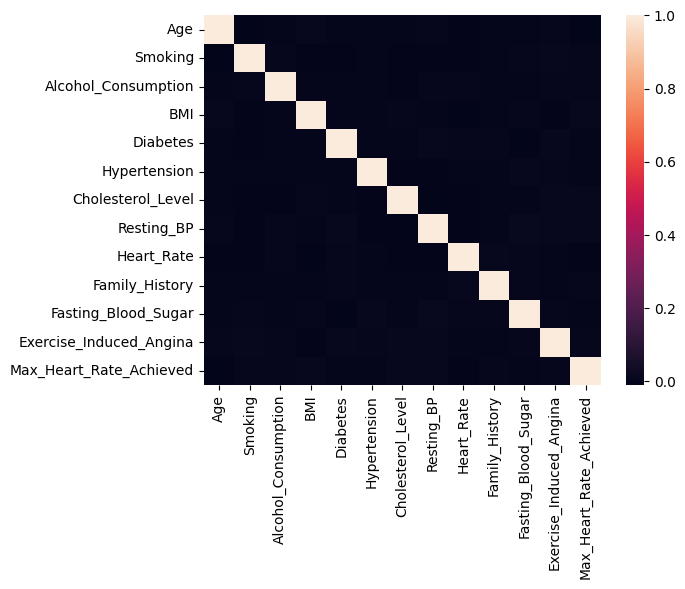

In [9]:
# Creat Correlation Matrix
correlation = df.select_dtypes("number").drop(columns="Heart_Attack_Risk").corr()
# Heatmap for correlation
sns.heatmap(correlation)

In [10]:
df.select_dtypes("number").nunique()

Age                          72
Smoking                       2
Alcohol_Consumption           2
BMI                        2501
Diabetes                      2
Hypertension                  2
Cholesterol_Level          1501
Resting_BP                   90
Heart_Rate                   70
Family_History                2
Fasting_Blood_Sugar           2
Exercise_Induced_Angina       2
Max_Heart_Rate_Achieved     100
Heart_Attack_Risk             2
dtype: int64

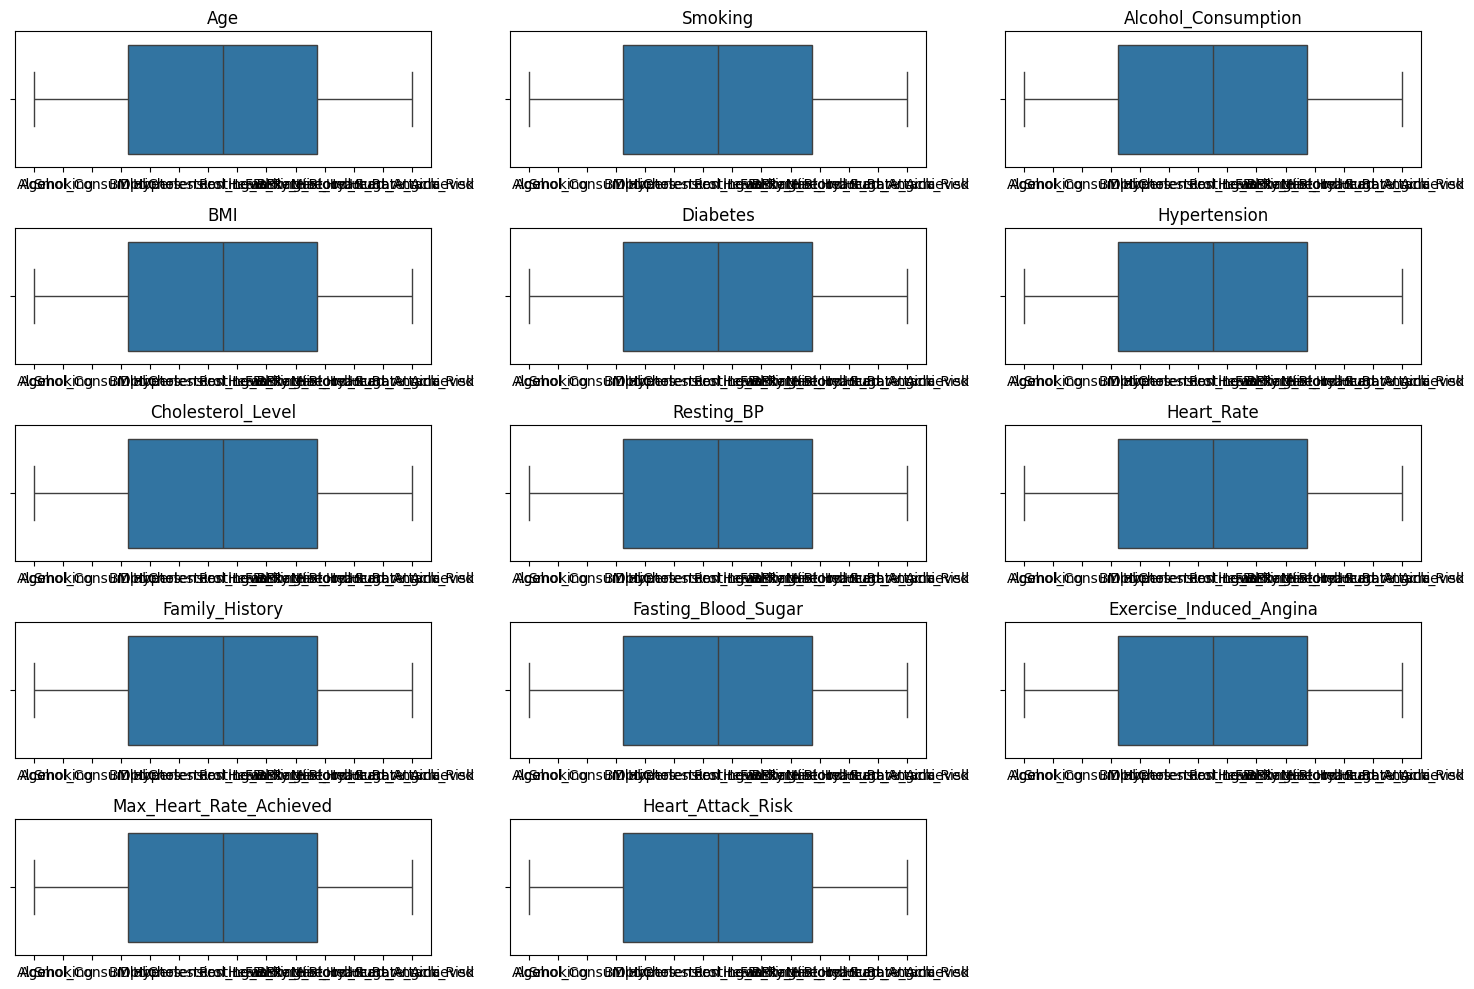

In [11]:
numerical_columns = [i for i in df.select_dtypes("number")]
plt.figure(figsize=(15,10))

for i, col in enumerate(numerical_columns,1):
    plt.subplot(5,3,i)
    sns.boxplot(x=numerical_columns)
    plt.title(col)

plt.tight_layout()
plt.show()

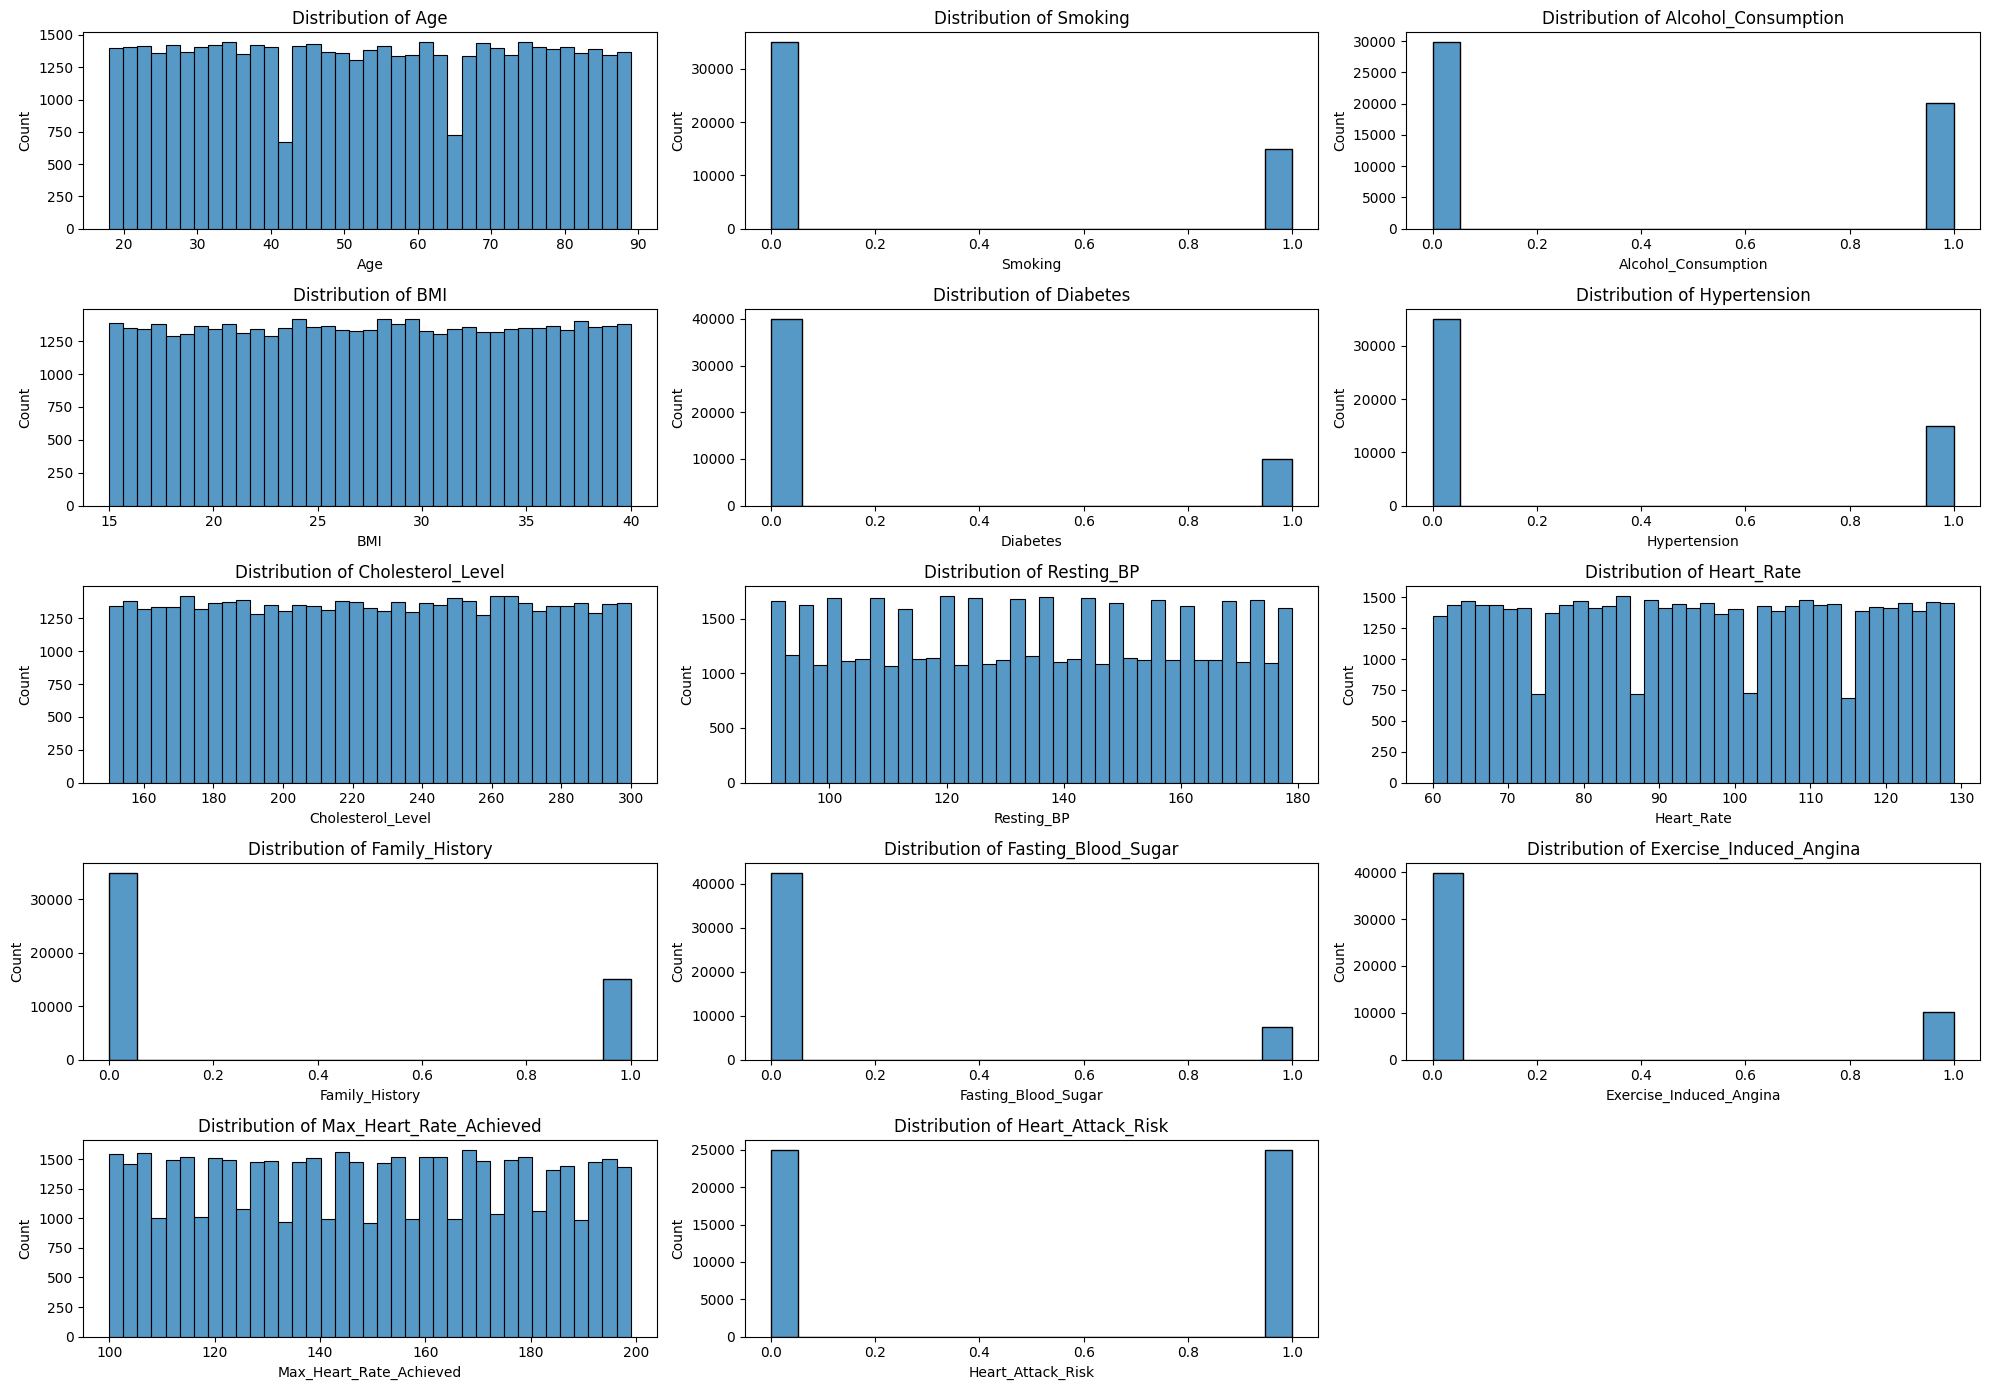

In [12]:
plt.figure(figsize=(20,14))

for i, col in enumerate(numerical_columns,1):
    plt.subplot(5,3,i)
    sns.histplot(df[col])
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [13]:
df.select_dtypes(include=["object"]).columns

Index(['Gender', 'Physical_Activity_Level', 'Stress_Level', 'Chest_Pain_Type',
       'Thalassemia', 'ECG_Results'],
      dtype='object')

<Axes: title={'center': 'Class Balance'}, xlabel='Class', ylabel='Relative Frequency'>

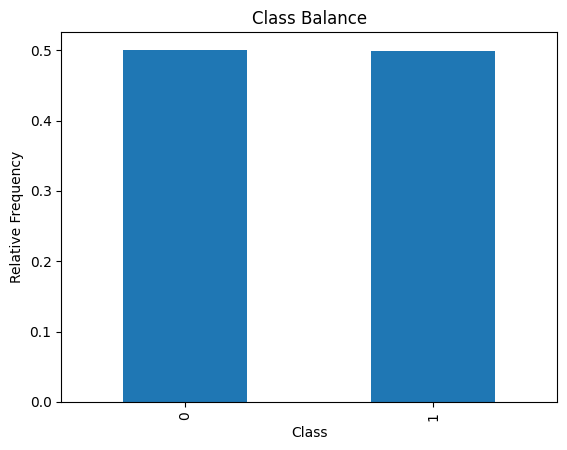

In [14]:
# Check Relative Proportion
category_counts = df["Heart_Attack_Risk"].value_counts(normalize = True)
category_counts.plot(kind = "bar",xlabel="Class",ylabel="Relative Frequency",title="Class Balance")

In [15]:
i_pivot = pd.pivot_table(
    df, index = "Chest_Pain_Type", values = "Heart_Attack_Risk",aggfunc="mean"
)
i_pivot

,Heart_Attack_Risk
Chest_Pain_Type,
Asymptomatic,0.501494
Atypical,0.493740
Non-anginal,0.502757
Typical,0.500079


In [16]:
i_pivot = pd.pivot_table(
    df,index = "ECG_Results",values= "Heart_Attack_Risk",aggfunc = "mean"
)
print(i_pivot)

                              Heart_Attack_Risk
ECG_Results                                    
Left Ventricular Hypertrophy           0.500966
Normal                                 0.501756
ST-T abnormality                       0.495823


In [17]:
i_pivot = pd.pivot_table(
    df,index = "Chest_Pain_Type",values= "Heart_Attack_Risk",aggfunc = "mean"
)
print(i_pivot)

                 Heart_Attack_Risk
Chest_Pain_Type                   
Asymptomatic              0.501494
Atypical                  0.493740
Non-anginal               0.502757
Typical                   0.500079


<Axes: title={'center': 'Class Balance'}, xlabel='Class', ylabel='Relative Frequency'>

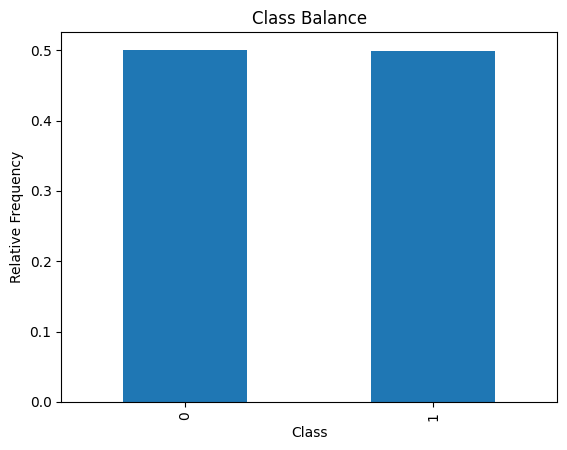

In [18]:
# Plot vlaue of "severe_damage "
df["Heart_Attack_Risk"].value_counts(normalize = True).plot(
   kind = "bar",xlabel="Class",ylabel="Relative Frequency",title="Class Balance"
)

In [19]:
low_class_prop,moderate_class_prop,high_class_prop = df["Heart_Attack_Risk"].value_counts(normalize = True)
print(low_class_prop,moderate_class_prop,high_class_prop)

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
# Split our data into feature metix and target value
target = "Heart_Attack_Risk"
X = df.drop(columns = target)
y = df[target]

In [ ]:
# Split the data using randomized test split
X_train ,X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)
print("X_test shape:",X_test.shape)
print("X_test shape:",y_test.shape)

In [ ]:
acc_baseline = df['Heart_Attack_Risk'].value_counts(normalize = True).max()
print("Baseline Accuracy:",round(acc_baseline,2))

In [ ]:
# Make, instantiate and fit the model 
model = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    LogisticRegression(max_iter = 3000)
)
model.fit(X_train,y_train)

In [ ]:
# Interate
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test,y_test)
print("Training Accuracy:",round(acc_train,2))
print("Test Accuracy:", round(acc_test,2))

In [ ]:
# Extract the feature names and importances from your model
features = model.named_steps["onehotencoder"].get_feature_names_out() 
importances = model.named_steps["logisticregression"].coef_[0]

In [ ]:
odd_ratio = pd.Series(np.exp(importances), index = features)
odd_ratio.head()

<Axes: >

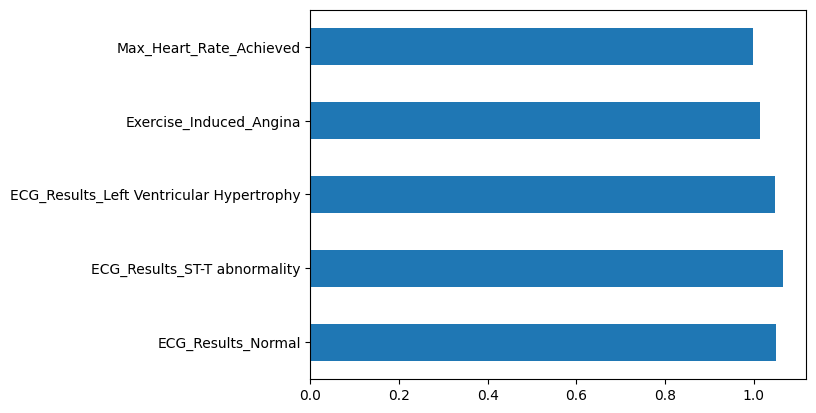

In [397]:
odd_ratio.tail().plot(kind="barh")